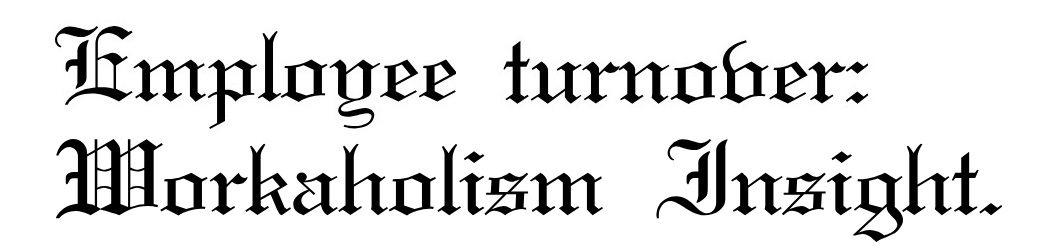

In [1]:
from IPython.display import Image
Image(filename='title.jpg', width=1200 , height=800 )


# <b><i>✅ Recommendations.</i></b>

<font size="+1"><b><i>Recommendation 1:</i></b></font>\
Your company needs more workaholics! 💪 \
Hire more employees with a long tenure from their previous companies, or employees with long term work experience. They are habit to work. Promote the workaholism integrative culture in your company!\
<br>
<font size="+1"><b><i>Recommendation 2:</i></b></font>\
Increase a work hours or involve in working process more the employees with 3 years turnover and below. They works less and leaves more.\
Increase their satisfaction through involvance and growth their workaholism from the beginnings!\
<br>
<font size="+1"><b><i>Recommendation 3:</i></b></font>\
Decrease satisfaction of 7 and 8 tenure year employees, until their tenure reach 9 year, otherwise they'll most likely could leave the company. You could make it by giving them a challenging tasks with higher failing chance or adding more work hours for advance the workaholism practice! 💪
<br>
<br>

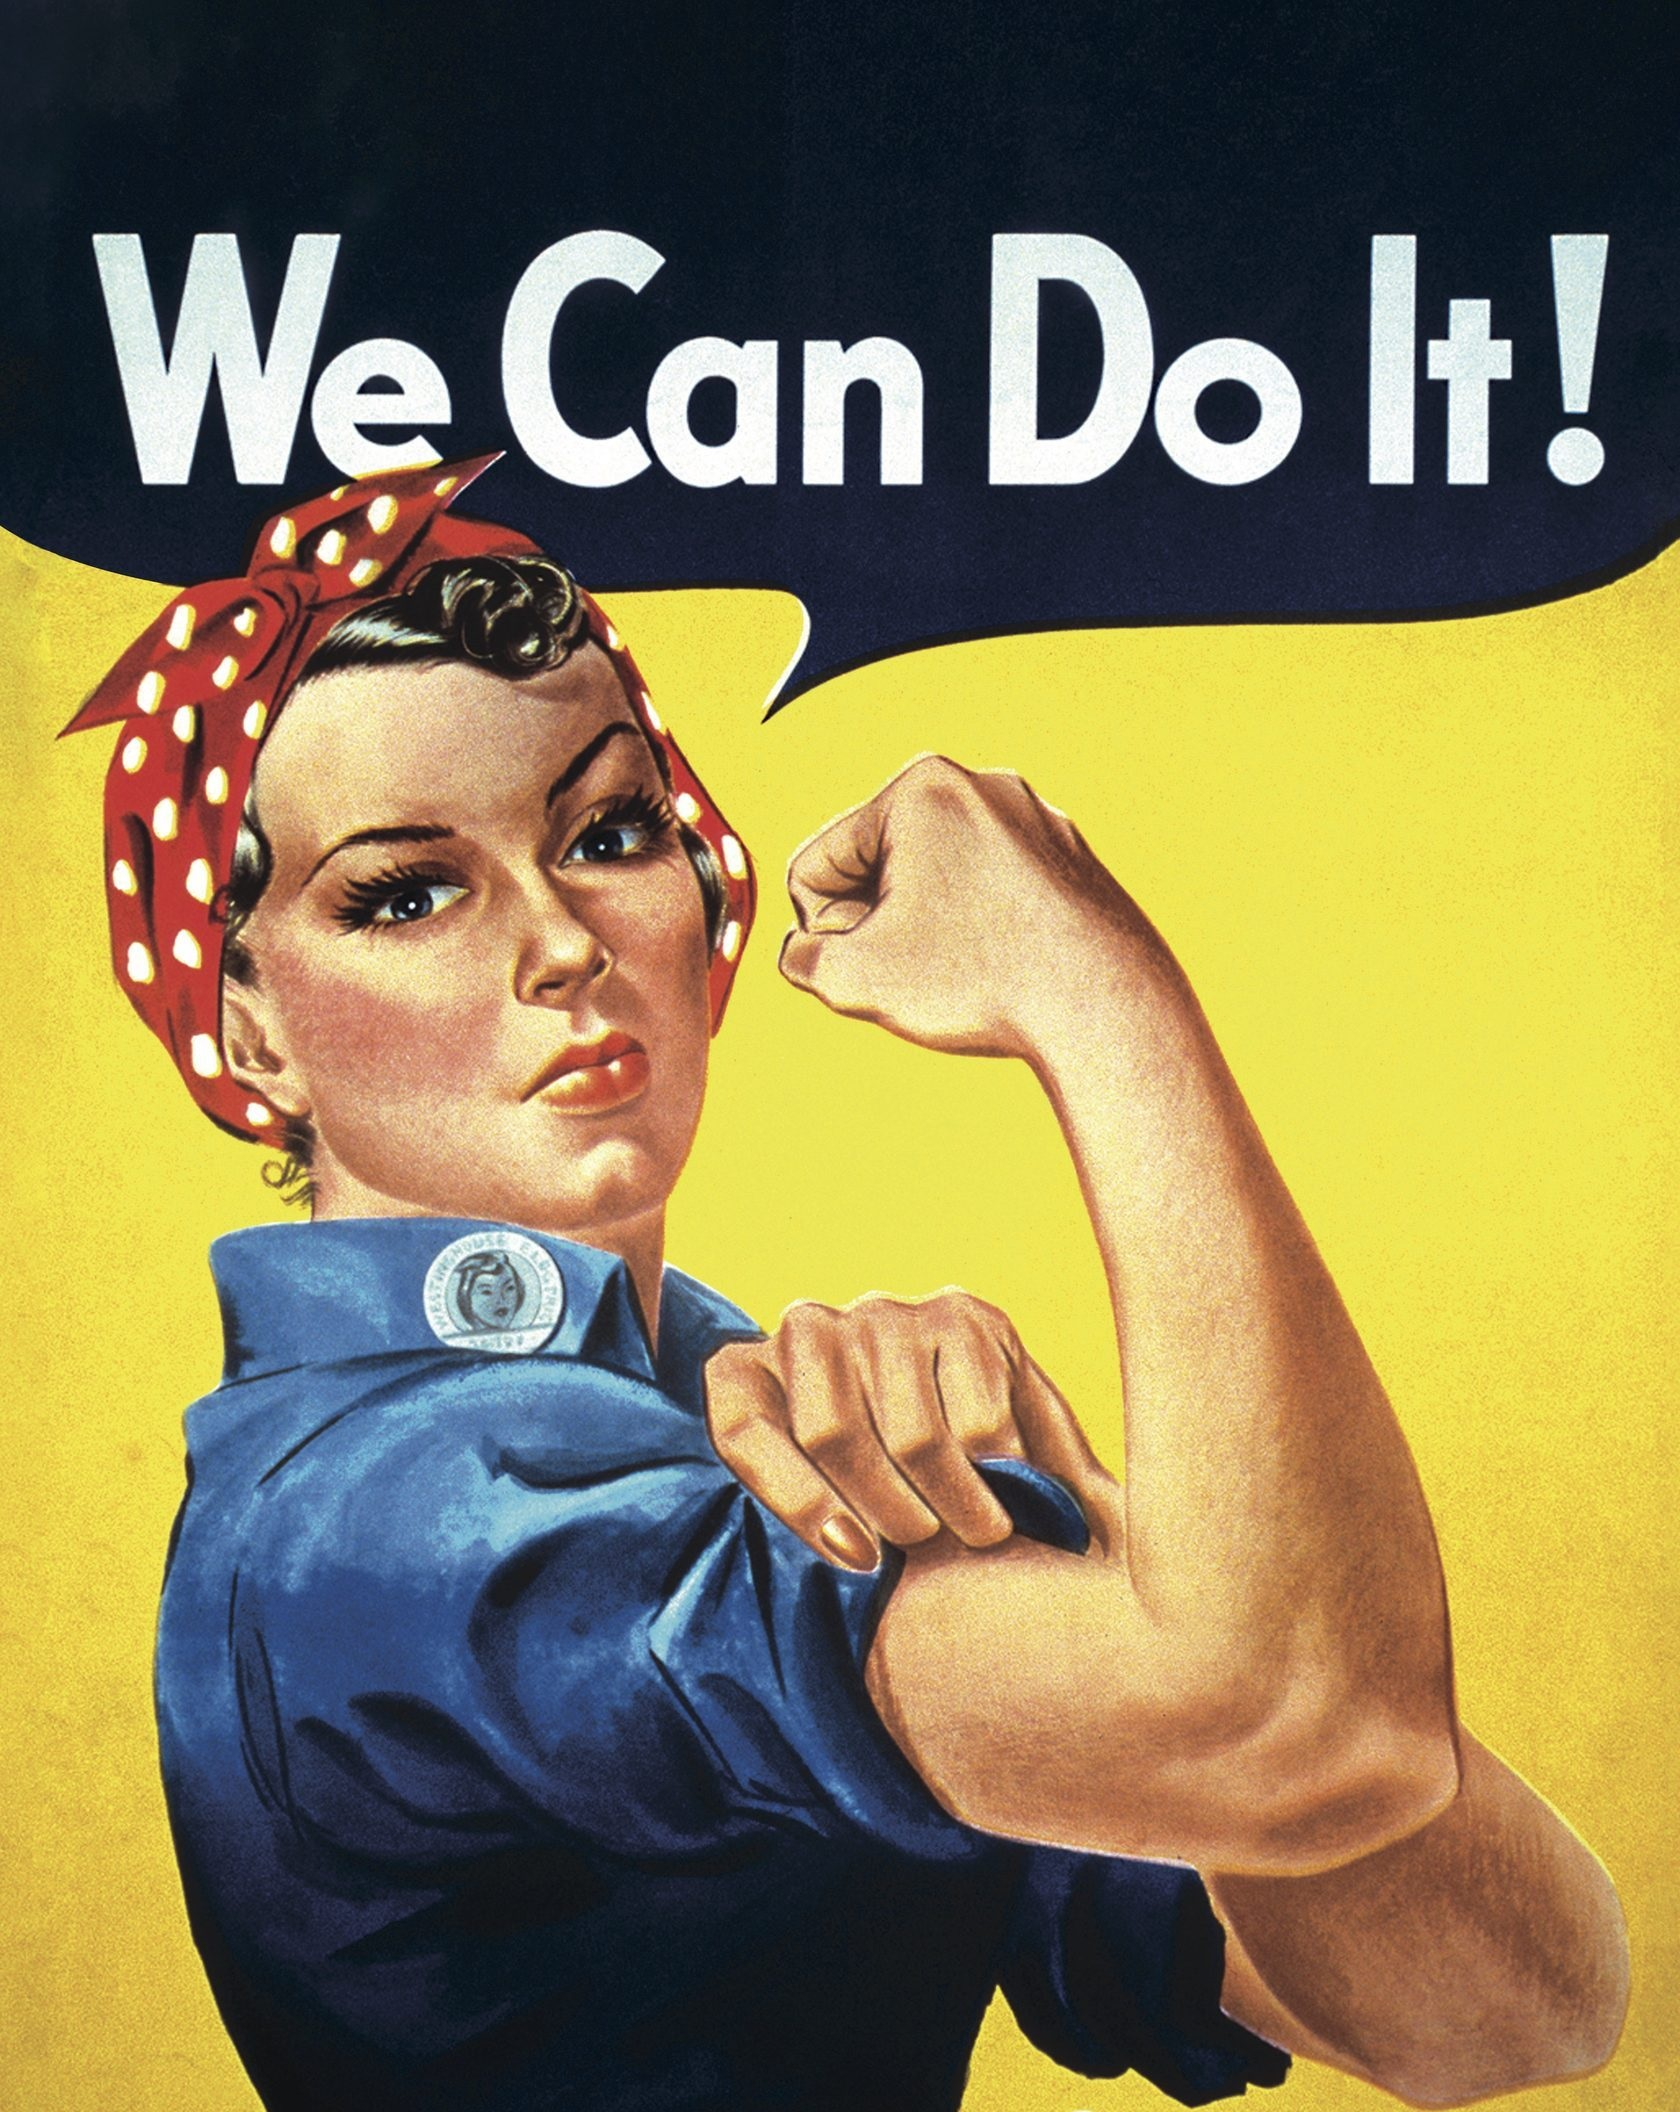

In [2]:
Image(filename='image.jpg', width=800 , height=600 ) 

In [3]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
import matplotlib as mpl
from scipy.cluster.hierarchy import linkage, fcluster
df = pd.read_csv('./data/employee_churn_data.csv')


 <font size="+1"><i>🐍 Prelude</i></font>

<i>Greetings.\
I joined this competition, because had a lot of experience with turnover myself while worked in sales most time of my career. So befor to start the exploring the data, I bet that the most of turnover are in the department of sales, but I'm open for another results of analisys.\
\
For first lets count the amount of left employees for <b>evaluate the turnover</b>. 🔎

In [4]:

print(df['left'].value_counts().to_string())
df_left_count = df['left'].value_counts()
df_left_per = (df_left_count / df_left_count.sum()) * 100
df_left_perc = df_left_per.round(2)
print(df_left_perc[['no']].to_string(), '%')
print(df_left_perc[['yes']].to_string(), '%')

no     6756
yes    2784
no    70.82 %
yes    29.18 %


## Looking on departments 🔎

Okay. The data shows that there is <b>around 29%</b> of employees are statisticaly left the company.\
Let's evaluate the turnover by the deparments.

In [5]:

df_counts = df[['department', 'left']]
df_counted = df_counts.value_counts().reset_index(name='counts')
df_counted_piv_displ = pd.pivot_table(df_counted, index = 'left', values = 'counts' , columns = 'department')
df_c_p_d = df_counted_piv_displ.loc['yes'].sort_values(ascending=False).reset_index(name='employee left').set_index('department').T
display(df_c_p_d)


department,sales,retail,engineering,operations,marketing,support,admin,logistics,IT,finance
employee left,537,471,437,436,243,212,119,111,110,108


<i>Excellent!</i>\
✅ The data shows, that the <b>most</b> turnover are in the <b>Sales</b>, <i>as I was bet</i>.\
But there is also a huge amount of turnover in Retail, Engineering and Operations departments, and a bit less in departments of a Marketing, Support, while others amount looks not essential. ✅ The <b>lowest</b> one looks in <b>Finance</b> and <b>IT</b>.\
Let's look on them in percents. 🔎

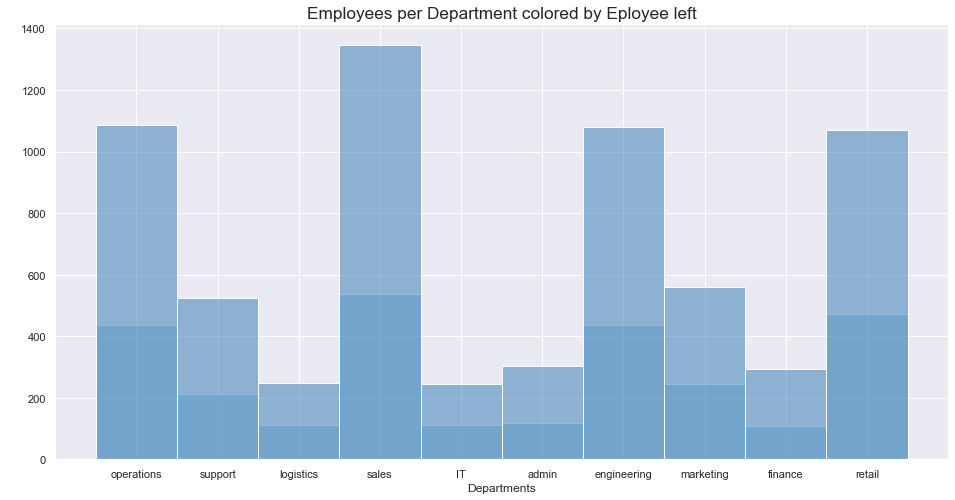

In [6]:

sns.set(rc={'figure.figsize':(16,8)})
sns.set_palette('RdBu_r')
sns.histplot(data=df, x="department", hue="left").set_title('Employees per Department colored by Eployee left', fontsize = 'x-large')
plt.legend([],[], frameon=False)
plt.xlabel('Departments')
plt.ylabel(' ')


plt.show()

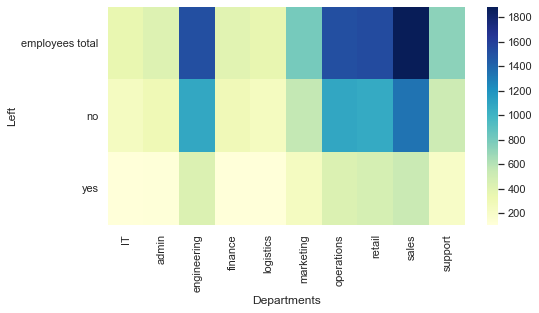

In [7]:

df_dep_total = df['department'].value_counts().reset_index(name='employees total')

df_counted_piv = pd.pivot_table(df_counted, index = 'left', values = 'counts' , columns = 'department')


df_counted_piv2 = pd.pivot_table(df_counted, index = 'department', values = 'counts' , columns = 'left')
df_counted_per = df_counted_piv2
df_counted_per['% of left'] = df_counted_piv2['yes'] / (df_counted_piv2['no'] + df_counted_piv2['yes']) * 100
df_counted_per['% of stay'] = df_counted_piv2['no'] / (df_counted_piv2['no'] + df_counted_piv2['yes']) * 100
df_counted_perc = df_counted_per[['% of left', '% of stay']].round(0).astype(int)

df_counted_perc_displ = pd.pivot_table(df_counted_perc, columns = 'department')
df_dep_total_disp_c = pd.pivot_table(df_dep_total, columns = 'index')

df_counted_comb = df_dep_total_disp_c.append(df_counted_piv)
df_counted_comba = df_counted_comb.append(df_counted_perc_displ)

sns.set(rc={'figure.figsize':(8,4)})
display(ax = sns.heatmap(df_counted_comb, cmap="YlGnBu"))
plt.xlabel('Departments')
plt.ylabel('Left')
plt.show()

In [8]:
display(df_counted_comba)

,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
employees total,356,423,1516,402,360,802,1522,1541,1883,735
no,246,304,1079,294,249,559,1086,1070,1346,523
yes,110,119,437,108,111,243,436,471,537,212
% of left,31,28,29,27,31,30,29,31,29,29
% of stay,69,72,71,73,69,70,71,69,71,71


<i>Looks like my previous sentence was not correct.</i> While looking on the turnover by department in <b>percentage</b> we can see that the turnover nearly equal <b>per each department</b>, and it is <b>around 28-30%</b>, <i>(except around 27% in finance department (why does this guys have not enough?))</i>.

## 🔍 Researching for correlations

<i>There should be another correlations we could find.</i> 🔎

In [9]:
df_counts = df[['left', 'department', 'projects', 'salary', 'tenure', 'promoted']]
display(df_counts.value_counts().reset_index(name='count').T.iloc[:, 0:20])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
left,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes
department,sales,retail,engineering,sales,operations,engineering,operations,engineering,sales,sales,retail,retail,retail,operations,sales,sales,sales,operations,retail,operations
projects,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,4,3
salary,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
tenure,6.0,6.0,6.0,5.0,6.0,7.0,7.0,5.0,8.0,7.0,7.0,8.0,5.0,5.0,7.0,6.0,7.0,8.0,6.0,8.0
promoted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
count,146,126,125,118,112,103,100,99,92,90,89,87,86,85,76,75,75,75,71,67


💡 This sample makes me think that there could be a correlation between employee <b>tenure</b> length and leaving 🔎

tenure                                                      \
department        IT     admin engineering   finance logistics marketing   
left                                                                       
no          6.589431  6.417763    6.552363  6.384354  6.562249  6.522361   
yes         6.654545  6.705882    6.572082  6.592593  6.450450  6.460905   

                                                     
department operations    retail     sales   support  
left                                                 
no           6.597606  6.572897  6.546062  6.541109  
yes          6.635321  6.632696  6.510242  6.622642

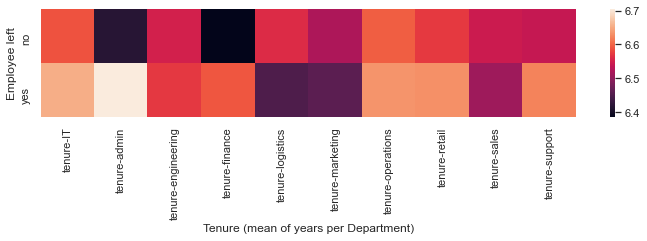

In [10]:
df_counts_for_map = df[['left', 'salary', 'department', 'tenure']]
df_c_piv=pd.pivot_table(df_counts_for_map, columns = 'department', index='left')
display(df_c_piv)
sns.set(rc={'figure.figsize':(12,2)})
ax = sns.heatmap(df_c_piv)
plt.xlabel('Tenure (mean of years per Department)')
plt.ylabel('Employee left')
plt.show()

<i>All the departments have <b>nearly equal</b> mean of tenure of employees, and it's not different much between left and not left employees.</i>

🔍 Let's check if they has been <b>promoted</b> and how did that influenced on their leaving:

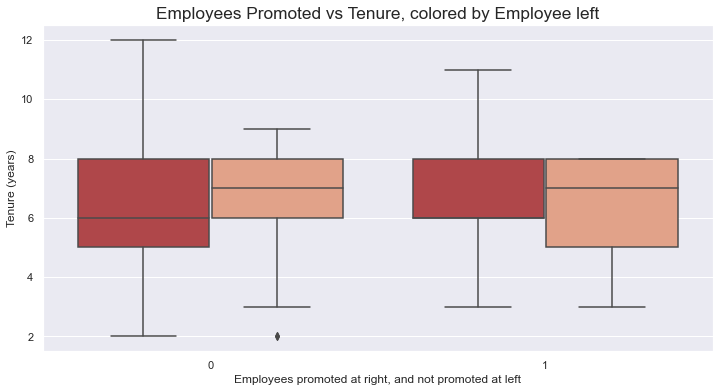

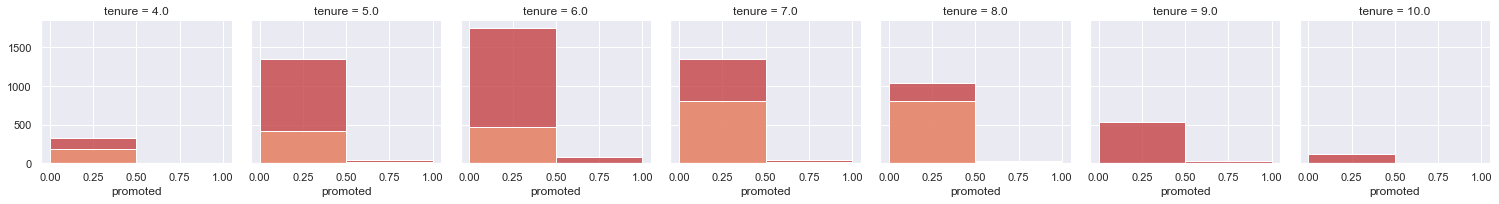

In [11]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_palette('RdBu')
sns.boxplot(x="promoted", y="tenure",
            hue="left",
            data=df).set_title('Employees Promoted vs Tenure, colored by Employee left', fontsize = 'x-large')
plt.legend([],[], frameon=False)
plt.xlabel('Employees promoted at right, and not promoted at left')
plt.ylabel('Tenure (years)')

df_tenure3 = df[df['tenure'] > 3]
df_tenure311 = df_tenure3[df['tenure'] < 11]
g = sns.FacetGrid(df_tenure311, col="tenure", hue="left", col_wrap=7)
g.map(sns.histplot, "promoted", binwidth=0.5)
plt.show()

In [12]:
df_counts_ten_l = df[['left', 'tenure', 'promoted']]
display((df_counts_ten_l).value_counts().reset_index(name='count').head(10))

promoted_total = df[df['promoted'] == 1]
total_promoted = promoted_total['promoted'].count()
promoted_l = promoted_total[promoted_total['left'] == 'yes']
promoted_left = promoted_l['promoted'].count()
print(total_promoted, 'total promoted employees; ', promoted_left, 'employees promoted left.')
promoted_left_perc = (promoted_left / total_promoted)*100

npromoted_total = df[df['promoted'] == 0]
total_npromoted = npromoted_total['promoted'].count()
npromoted_l = npromoted_total[npromoted_total['left'] == 'yes']
npromoted_left = npromoted_l['promoted'].count()
print(total_npromoted, 'total not promoted employees; ', npromoted_left, 'employees not promoted left.')
npromoted_left_perc = (npromoted_left / total_npromoted)*100

print(promoted_left_perc.round(2), '% of promoted employees left')
print(npromoted_left_perc.round(2), ' % of not promoted employees left')


,left,tenure,promoted,count
0,no,6.0,0,1759
1,no,5.0,0,1348
2,no,7.0,0,1346
3,no,8.0,0,1034
4,yes,7.0,0,806
5,yes,8.0,0,806
6,no,9.0,0,540
7,yes,6.0,0,471
8,yes,5.0,0,417
9,no,4.0,0,325


289 total promoted employees;  57 employees promoted left.
9251 total not promoted employees;  2727 employees not promoted left.
19.72 % of promoted employees left
29.48  % of not promoted employees left


🔍 Well, there is <b>groups</b> of <b>7</b> and <b>8 years</b> of tenure employees without promotion which left the company, and it's effects for this 'year group' more than for the <b>6</b> and <b>5</b> 'years groups'.\
💡 <i>Also the promoted employees left the company in compare with not promoted employees left the company in percentage are only around 10% difference. That makes look like <b>promotion</b> is <b>not</b> enough <b>effective</b> for keep the enough employee in the company.</i>\
\
But what's about the <b>average hours</b> the employees worked <b>per</b> a <b>months</b>? <i>Let's take a look</i> 🔎 :

In [13]:
displ_descr=df['avg_hrs_month'].describe().reset_index()
display(displ_descr)

,index,avg_hrs_month
0,count,9540.000000
1,mean,184.661571
2,std,4.144831
3,min,171.374060
4,25%,181.472085
5,50%,184.628796
6,75%,187.728708
7,max,200.861656


In [14]:
df_sorted_avg_hrs_month = df.sort_values('avg_hrs_month', ascending=False)
df_sorted_select=df_sorted_avg_hrs_month[['avg_hrs_month', 'left', 'department']]
df_sorted_select_t=df_sorted_select.round(2).T
display(df_sorted_select_t.iloc[:, 0:20])

,5723,7946,6456,5534,7780,5867,7357,7857,8135,8155,7607,5264,6710,6400,7635,5348,5388,5739,7707,5541
avg_hrs_month,200.86,199.38,199.3,198.58,198.17,198.16,197.92,197.77,197.7,197.56,197.55,197.5,197.46,197.29,197.26,197.01,196.83,196.82,196.79,196.78
left,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
department,marketing,sales,operations,finance,sales,support,operations,operations,operations,sales,IT,engineering,marketing,sales,sales,sales,support,retail,retail,IT


This sample shows that the employees which <b>worked</b> the <b>most hours</b> in the company are <b>stayed</b> in the company. <i>It's the core of the company, and they are from different departments.</i> 💡

# 💡 <i><b>Insight : Workaholism</b></i>

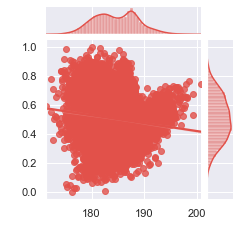

In [15]:
sns.set_palette('Spectral')
heart = sns.jointplot("avg_hrs_month", "satisfaction", height=3.5, data=df, kind='reg')
heart.set_axis_labels( " " , " " )
plt.show()

<i>Just because this red heart looks cute</i> 😍\
\
\
🔍 looking deeper:

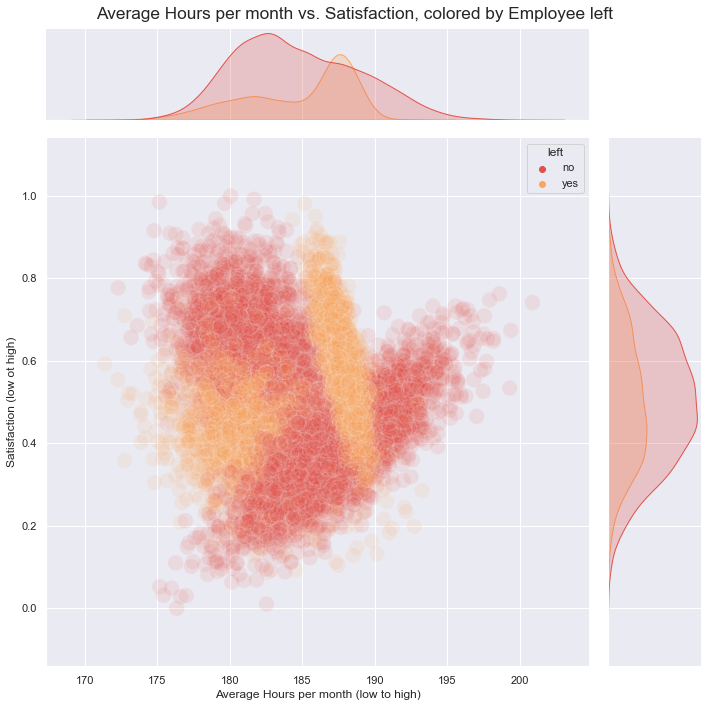

In [16]:

sns.set_palette('Spectral')
savhl = sns.jointplot("avg_hrs_month", "satisfaction", data=df, height=10, hue='left', alpha=0.1, s = 250)
savhl.fig.suptitle("Average Hours per month vs. Satisfaction, colored by Employee left", fontsize = 'x-large')
savhl.set_axis_labels( "Average Hours per month (low to high)" , "Satisfaction (low ot high)" )
savhl.fig.subplots_adjust( top = 0.95 )

plt.show()

🤔 The <b>data</b> visualisation above <b>shows</b> that there is many employees with <b>185-190 average hours</b> per month <b>left</b> the company, <i>and they had an average or <b>high satisfaction</b>.</i>

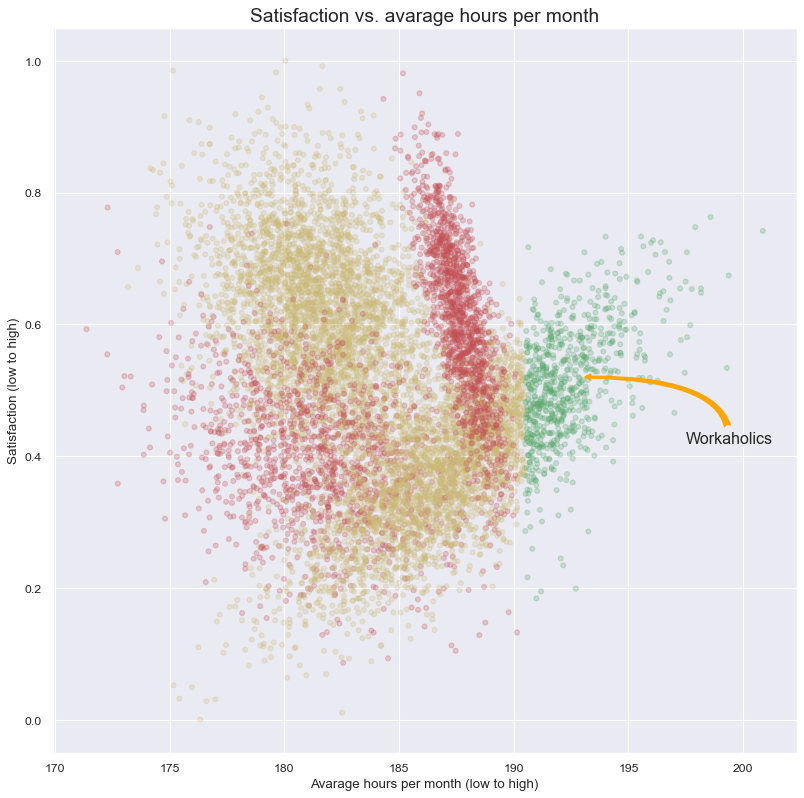

In [17]:
df[['left_num']] = df['left'].replace({'no': 1, 'yes': 2})

distance_matrix = linkage(df[['satisfaction', 'left_num', 'tenure']], 'ward')
df['cluster_labels'] = fcluster(distance_matrix, 18, criterion='maxclust')

figure(figsize=(12, 12), dpi=80)
colors = {1:'y', 2:'y', 3:'y', 4:'r', 5:'y', 6:'r', 7:'y', 8:'y', 9:'r', 10:'r', 11:'g', 12:'g', 13:'g', 14:'r', 15:'r', 16:'r', 17:'y', 18:'y'}
plt.scatter(data=df, x='avg_hrs_month',  y='satisfaction', c=df['cluster_labels'].apply(lambda x: colors[x]), alpha=0.25, s=20)

selected_x = 193
selected_y = 0.52
arrowprops = {'arrowstyle': 'fancy', 'connectionstyle': 'angle3', 'color':'orange'}
plt.annotate('Workaholics', fontsize='large', xy=(selected_x, selected_y), xytext=(selected_x + 4.5, selected_y - 0.1), arrowprops=arrowprops)

plt.title("Satisfaction vs. avarage hours per month", fontsize = 'x-large')
plt.xlabel('Avarage hours per month (low to high)')
plt.ylabel('Satisfaction (low to high)')

plt.show()


💡 As we see on the data visualisation above: there is a correlation within a group of most <b>workaholic employees</b> which are not left the company. <b><i>They works a lot and enjoyed that</i></b>.\
\
🔍 <i>Let's look closer on the data about this group for try to find more of another correlations:</i>

In [18]:
df_sorted_avghrm_sati = df.sort_values(['avg_hrs_month', 'satisfaction'])
display(df_sorted_avghrm_sati[['review', 'projects', 'salary', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month', 'left']][-20:].set_index('left').round(2).T)

left,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
review,0.79,0.64,0.59,0.7,0.62,0.72,0.79,0.65,0.57,0.64,0.64,0.67,0.67,0.78,0.71,0.58,0.65,0.71,0.62,0.51
projects,3,3,4,2,3,3,3,3,3,3,4,3,4,4,4,3,4,4,4,3
salary,medium,medium,high,medium,high,medium,medium,medium,medium,medium,medium,medium,low,low,medium,low,medium,low,high,low
tenure,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0
satisfaction,0.7,0.67,0.55,0.64,0.47,0.65,0.58,0.53,0.66,0.71,0.58,0.6,0.65,0.75,0.65,0.65,0.76,0.53,0.67,0.74
bonus,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1
avg_hrs_month,196.78,196.79,196.82,196.83,197.01,197.26,197.29,197.46,197.5,197.55,197.56,197.7,197.77,197.92,198.16,198.17,198.58,199.3,199.38,200.86


💡 <i>The first thing I see in this workaholics data is their</i> <b>tenure</b>.

## Tenure 🔎

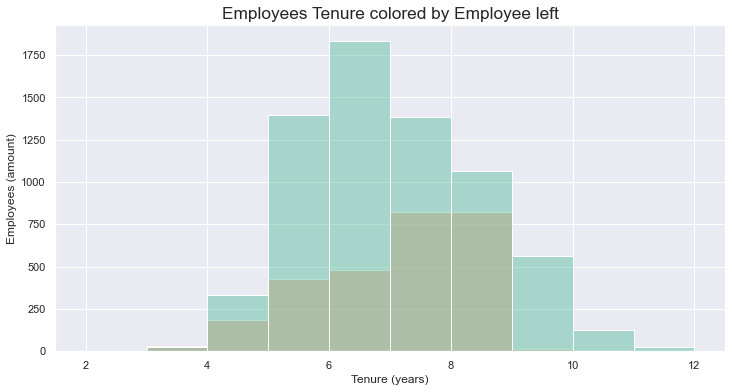

In [19]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_palette('Set2')
sns.histplot(x="tenure",
            hue="left",
            data=df, binwidth=1).set_title('Employees Tenure colored by Employee left', fontsize = 'x-large')
plt.legend([],[], frameon=False)

plt.xlabel('Tenure (years)')
plt.ylabel('Employees (amount)')
plt.show()

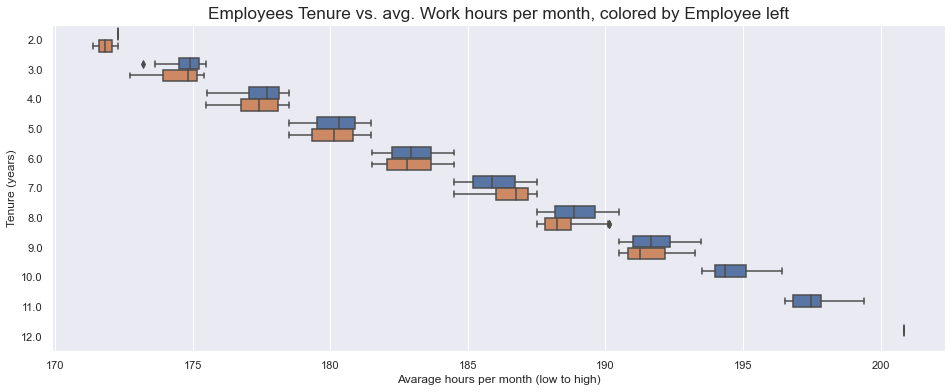

In [20]:
sns.set(rc={'figure.figsize':(16, 6)})
tavh = sns.boxplot(x="avg_hrs_month", y="tenure", hue="left", data=df, orient='h')
tavh.set_title('Employees Tenure vs. avg. Work hours per month, colored by Employee left', fontsize = 'x-large')
plt.xlabel('Avarage hours per month (low to high)')
plt.ylabel('Tenure (years)')
plt.legend([],[], frameon=False)
plt.show()

<i>On the visualisation above we can see the progression of candidates to become the <b>workaholic</b>. There is a lot of difficulties on this way, and most of them are gives up on the middle of the way, include the last year - <b>9</b>, until completely and proovely becomes the <b>workaholics</b>.</i>\
\
🔍 <i>Let's take a look on their</i> <b>satisfaction</b> <i>on this long and difficult way:</i>

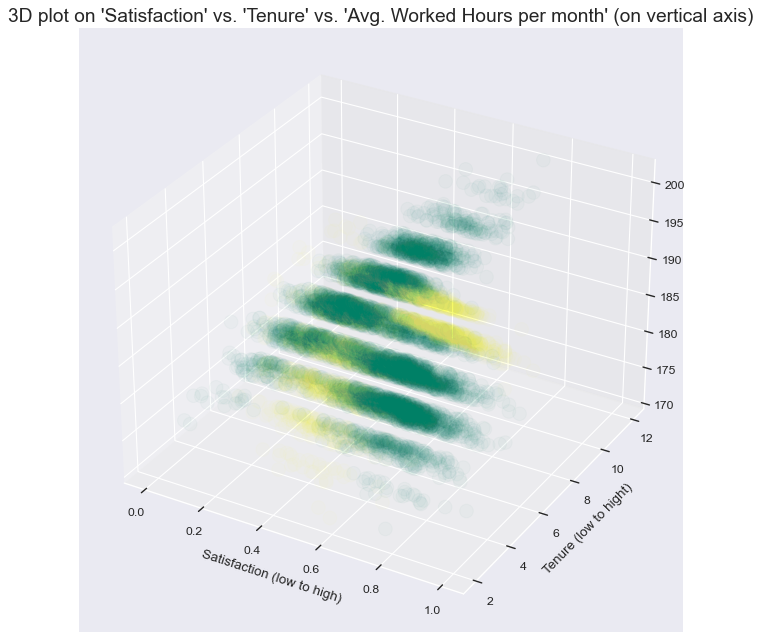

In [21]:
X = df[['satisfaction']]
C = df[['left_num']]
Y = df[['tenure']]
Z = df[['avg_hrs_month']]

figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c=C, cmap='summer', alpha=0.025, s=150)

ax.set_title("3D plot on 'Satisfaction' vs. 'Tenure' vs. 'Avg. Worked Hours per month' (on vertical axis)", fontsize = 'x-large')
plt.xlabel('Satisfaction (low to high)')
plt.ylabel('Tenure (low to hight)')
plt.show()

## "You'll start to Enjoy This"

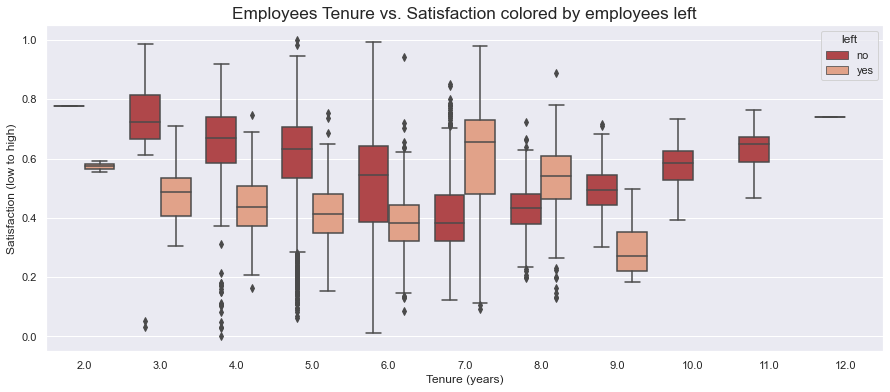

In [22]:
sns.set(rc={'figure.figsize':(15,6)})
sns.set_palette('RdBu')
sns.boxplot(x="tenure", y="satisfaction",
            hue="left",
            data=df).set_title('Employees Tenure vs. Satisfaction colored by employees left', fontsize = 'x-large')
plt.xlabel('Tenure (years)')
plt.ylabel('Satisfaction (low to high)')

plt.show()

<i>This visualisation from above shows how changes the</i> <b>satisfaction</b> <i>with the</i> <b>tenure</b> <i>lenght and how it's related with employees</i> <b>leaving</b> <i>the company.</i>\
Too much conclusions is possible to make from this boxplot.\
<i>I did few:</i>\
\
💡<b>The first:</b> the <b><i>newbies</i></b> with a <b><i>low tenure</i></b> doesn't leave the company while their <b><i>satisfaction</i></b> is <b><i>high</i></b>. ✅\
\
💡 <b>The second:</b> things is <b><i>changes</i></b> to a middle of the plot - at <b><i>7 year</i></b> of <b><i>tenure</i></b>: the employees <b><i>leaves</i></b> the company with <b><i>high satisfaction</i></b> ✅, while <b><i>low-satisfated</i></b> employees does <b><i>not</i></b>. <i>(There is inside somewhere a treasure of the true workaholism is hidden).</i>\
\
💡 <b>The</b> later and the <b>end:</b> the employees <b><i>satisfaction</i></b> starts to slowly <b><i>increases</i></b> back <b><i>after</i></b> the critical <b><i>7th year</i></b>, <i>and all this process is looks like the process of acception of a psychological trauma.</i> In the end <b><i>they are starts to enjoy what they do!</i></b>


## 🤔 Salary vs Satisfaction 🔎

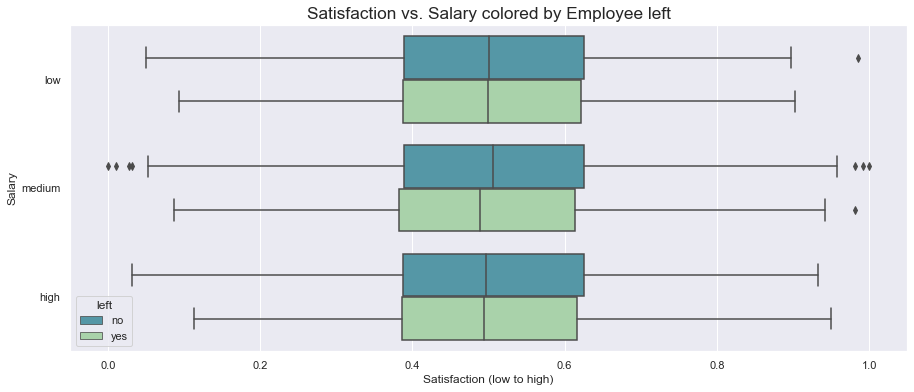

In [23]:
sns.set_palette('Spectral_r')
sns.boxplot(data=df, x='satisfaction', y='salary', hue='left').set_title("Satisfaction vs. Salary colored by Employee left", fontsize = 'x-large')
plt.xlabel('Satisfaction (low to high)')
plt.ylabel('Salary')
plt.show()

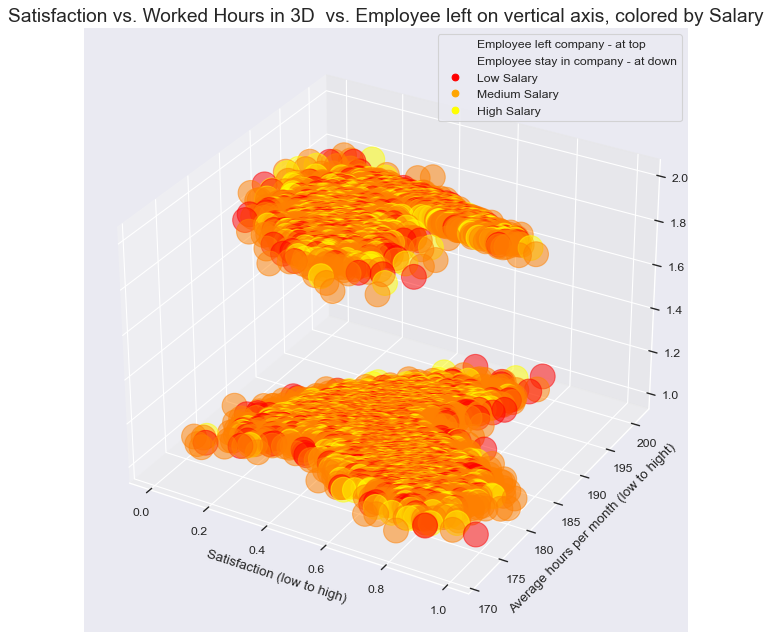

In [24]:
df['salary_num'] = df['salary'].replace({'high': 3, 'medium': 2, 'low': 1})

X = df[['satisfaction']]
C = df[['salary_num']]
Y = df[['avg_hrs_month']]
Z = df[['left_num']]

figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c=C, cmap='autumn', alpha=0.5, s=500)
ax.set_title("Satisfaction vs. Worked Hours in 3D  vs. Employee left on vertical axis, colored by Salary", fontsize = 'x-large')

scatter1_proxy = mpl.lines.Line2D([0],[0], linestyle="none")
scatter2_proxy = mpl.lines.Line2D([0],[0], linestyle="none")
scatter4_proxy = mpl.lines.Line2D([0],[0], linestyle="none", marker='o', color='red')
scatter5_proxy = mpl.lines.Line2D([0],[0], linestyle="none", marker='o', color='orange')
scatter6_proxy = mpl.lines.Line2D([0],[0], linestyle="none", marker='o', color='yellow')
ax.legend([scatter1_proxy, scatter2_proxy, scatter4_proxy, scatter5_proxy, scatter6_proxy], ['Employee left company - at top', 'Employee stay in company - at down', 'Low Salary', 'Medium Salary', 'High Salary'], numpoints = 1)

plt.xlabel('Satisfaction (low to high)')
plt.ylabel('Average hours per month (low to hight)')
plt.show()

💡 <i>Salary  and satisfaction vs. average hours per month </i><b>shows no</b><i> strong correlation on employees leaving.</i>

# <b><i>📖 Conclusions: </i></b>

In common, some <b>people works just because they works</b>.\
\
💡 The massive leaving incident in the 5-6 and 7-8 tenure groups could be explained by a <b><i>subcultural</i></b> existing phenomenon within the 5 and 6 years of tenure and the 7 and 8 years of tenure groups. Employees became in the company in the same year and formed within a newbies social groups by interests related with a marker of their year of becoming in the company, <i>because they met the <b>adaptational stress</b> the same time that <b>united</b> them in a specific <b>subcultural groups</b> within a their groups of <b>years of tenure marker</b>.</i>\
<i>For more researching of this phenomenon there is not enough data in this data file. Future researching needs a data to analyse communications between the employees and their formal and non-formal interactions within the company for check this hypothesys. As well as the history of a company's decisions and cultural analysis of the subcultures of the groups, for analyse why exactly this groups decided to leave.</i>\
\
🤔 As a respond to the <b>subcultural turnover</b> the company could <b>advancing</b> the <b>workaholic integrative culture</b>.